In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading the csv and removing the 'ID' column**

In [5]:
df = pd.read_csv('Heart Diseases.csv')

In [6]:
df

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
0,hdoamedhe7le8psut,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,hdoamedhodc3upsut,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,hdoamedds1byapsut,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,hdoamed03ldb7psut,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,hdoamedkixctypsut,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,hdoamed4f8a4lpsut,57.0,1,2,124,261,0,0,141,0,0.3,1,0,7,1
306,hdoamed5qpd5jpsut,44.0,0,3,118,242,0,0,149,0,0.3,2,1,3,0
307,hdoamedimjs34psut,51.0,1,3,100,222,0,0,143,1,1.2,2,0,3,0
308,hdoamedjkq7uepsut,55.0,1,4,140,217,0,0,111,1,5.6,3,0,7,3


In [7]:
df.describe()

,age,sex,cp,restbps,chol,fbs,restecg,exang,oldpeak,slope,outcome
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,54.224839,0.680645,3.161290,131.600000,257.054839,0.145161,0.980645,0.329032,1.160000,1.606452,0.941935
std,9.402750,0.466980,0.955203,17.552547,197.218556,0.352833,0.994945,0.470621,2.210349,0.617928,1.229301
min,5.700000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.250000,0.000000,3.000000,120.000000,211.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.500000,0.000000,0.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.750000,0.000000,2.000000,1.000000,1.750000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,3600.000000,1.000000,2.000000,1.000000,34.000000,3.000000,4.000000


In [8]:
df.info() #first glace: no nulls, wrong types?, small dataframe.
          #thalack, ca, thal why object ? should be int ? -> maybe inconsistencies in data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       310 non-null    object 
 1   age      310 non-null    float64
 2   sex      310 non-null    int64  
 3   cp       310 non-null    int64  
 4   restbps  310 non-null    int64  
 5   chol     310 non-null    int64  
 6   fbs      310 non-null    int64  
 7   restecg  310 non-null    int64  
 8   thalack  310 non-null    object 
 9   exang    310 non-null    int64  
 10  oldpeak  310 non-null    float64
 11  slope    310 non-null    int64  
 12  ca       310 non-null    object 
 13  thal     310 non-null    object 
 14  outcome  310 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 36.5+ KB


In [9]:
for i in df.columns[1:]:        #checking uniques, small dataset so might find something. no ID. found '?'. null values. in ca and thal
  print(i, df[i].unique(), " ") #age has 5.7 point, wrong entry ?. chol has 3600, wrong entry ?. thalack has ['1,71','1,42'], wrong entry?. #oldpeak has 34. ?
                                #inconsistencies in data.

age [63.  67.  37.  41.  56.  62.  57.  53.  44.  52.  48.  54.  49.  64.
 58.  60.  50.  66.  43.  40.  69.  59.  42.  55.  61.  65.  71.  51.
 46.  45.  39.  68.  47.  34.  35.  29.  70.  77.  38.  74.   5.7 76. ]  
sex [1 0]  
cp [1 4 3 2]  
restbps [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]  
chol [ 233  286  229  250  204  236  268  354  254  203  192  294  256  263
  199  168  239  275  266  211  283  284  224  206  219  340  226  247
  167  230  335  234  177  276  353  243  225  302  212  330  175  417
  197  198  290  253  172  273  213  305  216  304  188  282  185  232
  326  231  269  267  248 3600  258  308  245  270  208  264  321  274
  325  235  257  164  141  252  255  201  222  260  182  303  265  309
  307  249  186  341  183  407  217  288  220  209  227  261  174  281
  221  205  240  289  318  298  564  24

In [10]:
df[(df['ca'].str.isnumeric() == False) | (df['thal'].str.isnumeric() == False)]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
87,hdoamed3uds1bpsut,53.0,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,hdoamedyjtgkypsut,52.0,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,hdoamedycwz96psut,43.0,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,hdoamedst0g3npsut,52.0,1,4,128,204,1,0,156,1,1.0,2,0,?,2
287,hdoamedq0f6dtpsut,58.0,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,hdoamed8a4l5qpsut,38.0,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [11]:
#maybe fill nulls with mode or median? or remove ?

In [12]:
df[df['age'] ==5.7]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
250,hdoamedow89nopsut,5.7,1,4,110,201,0,0,126,1,1.5,2,0,6,0


In [13]:
df[df['chol'] ==3600]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
75,hdoamedv93w6dpsut,65.0,0,3,160,3600,0,2,151,0,0.8,1,0,3,0


In [14]:
df[df['oldpeak']==34.]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
299,hdoamedn9erxppsut,68.0,1,4,144,193,1,0,141,0,34.0,2,2,7,2


In [15]:
['1,71','1,42']

['1,71', '1,42']

In [16]:
df[ (df['thalack'] == '1,71') | (df['thalack']=='1,42') ]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
19,hdoamed0gkpajpsut,49.0,1,2,130,266,0,0,"1,71",0,0.6,1,0,3,0
65,hdoamed42qzhhpsut,60.0,1,4,145,282,0,2,"1,42",1,2.8,2,2,7,2


In [17]:
#inconsistencies SEEM like wrong entries. needs more checking -> not outliers.? might be better to fix than remove. needs checking with client/professional. 

In [18]:
#will keep for now. for vis purposes.

In [19]:
df.duplicated().sum() #duplicates check. remove.?

7

In [20]:
df[df.duplicated()]

,ID,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
303,hdoamedt0eof5psut,60.0,0,4,150,258,0,2,157,0,2.6,2,2,7,3
304,hdoamed5iw95ypsut,56.0,1,4,132,184,0,2,105,1,2.1,2,1,6,1
305,hdoamed4f8a4lpsut,57.0,1,2,124,261,0,0,141,0,0.3,1,0,7,1
306,hdoamed5qpd5jpsut,44.0,0,3,118,242,0,0,149,0,0.3,2,1,3,0
307,hdoamedimjs34psut,51.0,1,3,100,222,0,0,143,1,1.2,2,0,3,0
308,hdoamedjkq7uepsut,55.0,1,4,140,217,0,0,111,1,5.6,3,0,7,3
309,hdoamedkqqptipsut,43.0,1,3,130,315,0,0,162,0,1.9,1,1,3,0


In [21]:
#df.drop_duplicates(inplace=True)
#df.duplicated().sum()
#keep for comparison purposes

In [22]:
df.shape #might lose 7 points(2.25% of original data) due to duplication. might lose another 6(1.9% of original data) due to nulls.

(310, 15)

###**Cleaning and boxplots**

In [23]:
df1 = df.copy()

In [24]:
df1['age'].replace(5.7, 57, inplace=True)
df1['chol'].replace(3600, 360, inplace=True)
df1['oldpeak'].replace(34., 3.4, inplace=True)
df1['thalack'].replace(['1,71','1,42'], ['171','142'], inplace=True)

df1['ca'].replace('?', np.nan, inplace=True)
df1['thal'].replace('?', np.nan, inplace=True)

In [25]:
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1.drop(['index'], axis=1, inplace=True)

In [26]:
df1['thalack'] = df1['thalack'].astype(int)
df1['ca'] = df1['ca'].astype(int)
df1['thal'] = df1['thal'].astype(int)

In [27]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()

0

In [28]:
df1 = df1.drop('ID', axis=1)

In [29]:
df1

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome
0,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0,4,140,241,0,0,123,1,0.2,2,0,7,1
293,45.0,1,1,110,264,0,0,132,0,1.2,2,0,7,1
294,68.0,1,4,144,193,1,0,141,0,3.4,2,2,7,2
295,57.0,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [30]:
discrete_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'outcome']
cols_list = list(df1.columns)

for column in discrete_list:
  cols_list.remove(column)

import plotly.express as px
for column in cols_list:
  fig = px.box(df1, y=column)
  fig.show()

In [31]:
#better distribution. more clear outliers.

In [32]:
#for fun lolz

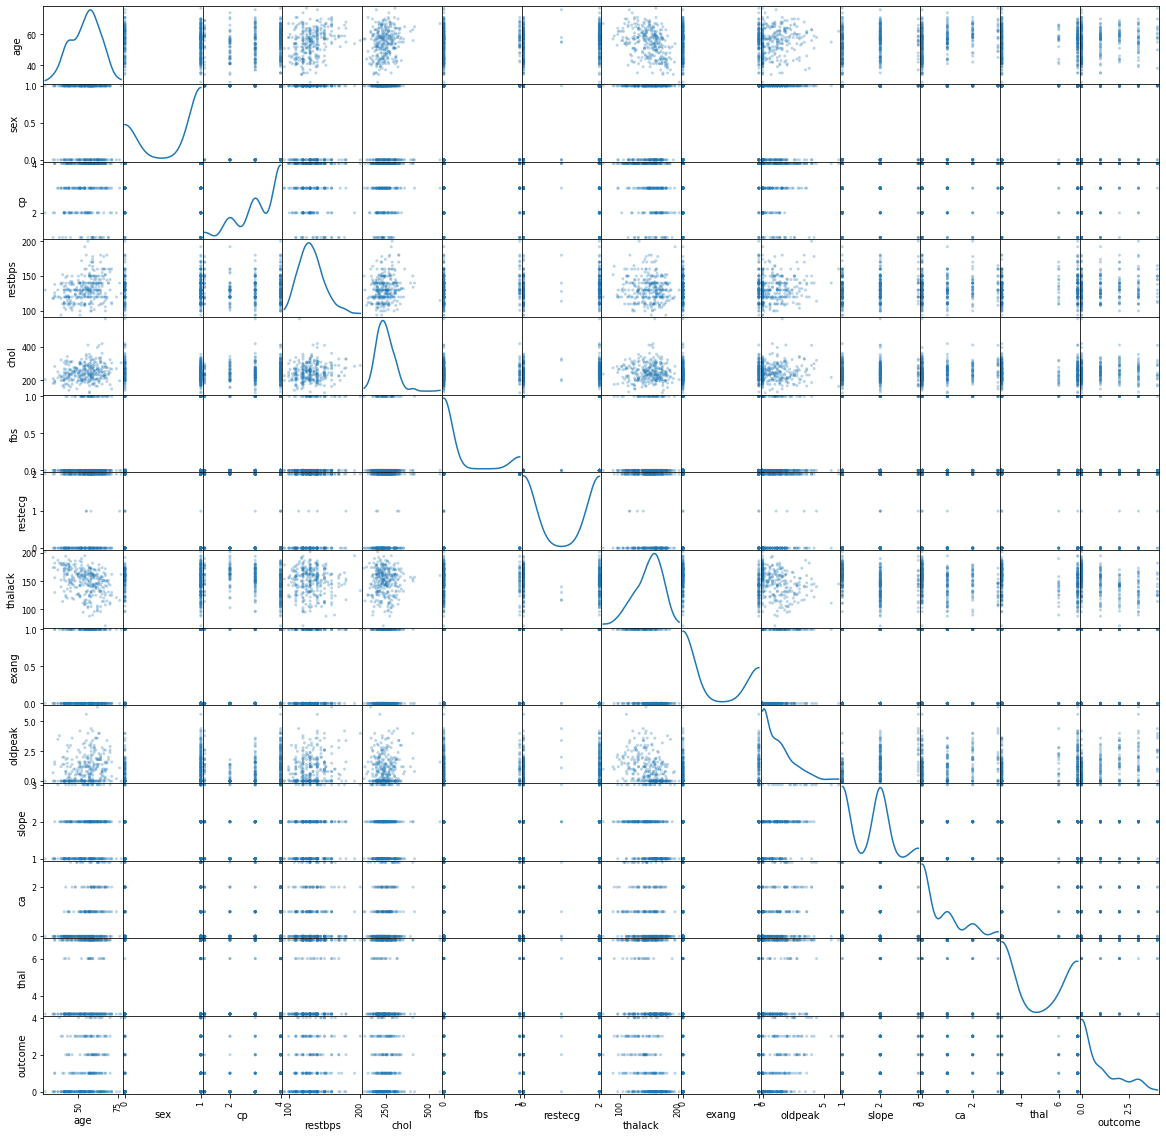

In [33]:
pd.plotting.scatter_matrix(df1, alpha = 0.3, figsize = (20,20), diagonal = 'kde');

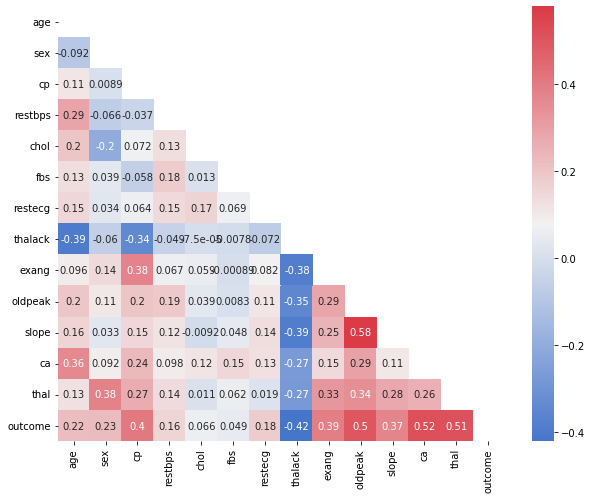

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
matrix = np.triu(corr)

sns.heatmap(corr, mask=matrix,
            cmap=sns.diverging_palette(255, 10, as_cmap=True),
            ax=ax, annot=True)

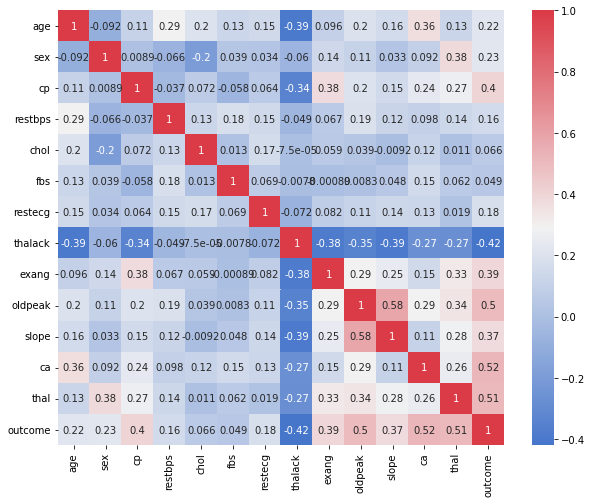

In [35]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
#matrix = np.triu(corr)

sns.heatmap(corr,
            cmap=sns.diverging_palette(255, 10, as_cmap=True),
            ax=ax, annot=True)

In [36]:
#all below is old notebook

In [37]:
df1['Normal_Max_Heart_Rate'] = 220-df1['age']
df1

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,Normal_Max_Heart_Rate
0,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0,157.0
1,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2,153.0
2,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1,153.0
3,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0,183.0
4,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0,4,140,241,0,0,123,1,0.2,2,0,7,1,163.0
293,45.0,1,1,110,264,0,0,132,0,1.2,2,0,7,1,175.0
294,68.0,1,4,144,193,1,0,141,0,3.4,2,2,7,2,152.0
295,57.0,1,4,130,131,0,0,115,1,1.2,2,1,7,3,163.0


In [38]:
df1['Max_Heart_Rate_difference'] = df1['Normal_Max_Heart_Rate'] - df1['thalack']
# + is good
df1

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,Normal_Max_Heart_Rate,Max_Heart_Rate_difference
0,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0,157.0,7.0
1,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2,153.0,45.0
2,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1,153.0,24.0
3,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0,183.0,-4.0
4,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0,179.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0,4,140,241,0,0,123,1,0.2,2,0,7,1,163.0,40.0
293,45.0,1,1,110,264,0,0,132,0,1.2,2,0,7,1,175.0,43.0
294,68.0,1,4,144,193,1,0,141,0,3.4,2,2,7,2,152.0,11.0
295,57.0,1,4,130,131,0,0,115,1,1.2,2,1,7,3,163.0,48.0


In [39]:
df1['Max_Heart_Rate_difference'].describe()

count    297.000000
mean      15.858586
std       21.080289
min      -29.000000
25%        0.000000
50%       12.000000
75%       28.000000
max       82.000000
Name: Max_Heart_Rate_difference, dtype: float64

In [40]:
counter = 0
TempCounter = 0
j = -30
while j <= 80:
  for i in range(0, len(df1)):
    if df1['Max_Heart_Rate_difference'].iloc[i] >= j and df1['Max_Heart_Rate_difference'].iloc[i] <= j+10:
      TempCounter +=1
  print(str(j)+'-'+str(j+10)+' --->',TempCounter)
  TempCounter = 0
  j = j+10+1

-30--20 ---> 4
-19--9 ---> 26
-8-2 ---> 63
3-13 ---> 65
14-24 ---> 51
25-35 ---> 34
36-46 ---> 21
47-57 ---> 21
58-68 ---> 8
69-79 ---> 3
80-90 ---> 1


In [41]:
import plotly.express as px
fig = px.box(df1, y='Max_Heart_Rate_difference')
fig.show()

In [42]:
df1[df1['Max_Heart_Rate_difference'] == -29]
df1[df1['chol'] == 3600]

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,Normal_Max_Heart_Rate,Max_Heart_Rate_difference


In [43]:
def Corr (data, col):
  plt.figure(figsize=(12,10))
  cor = data.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()

  cor_target = abs(cor[col])
  relevant_features = cor_target[cor_target>0.35]

  print(relevant_features)

  DF = pd.DataFrame()
  col = data.columns
  relevantF = relevant_features.index
  for c in col:

    if (c in relevantF):
      DF[c] = data[c].copy()

  return DF

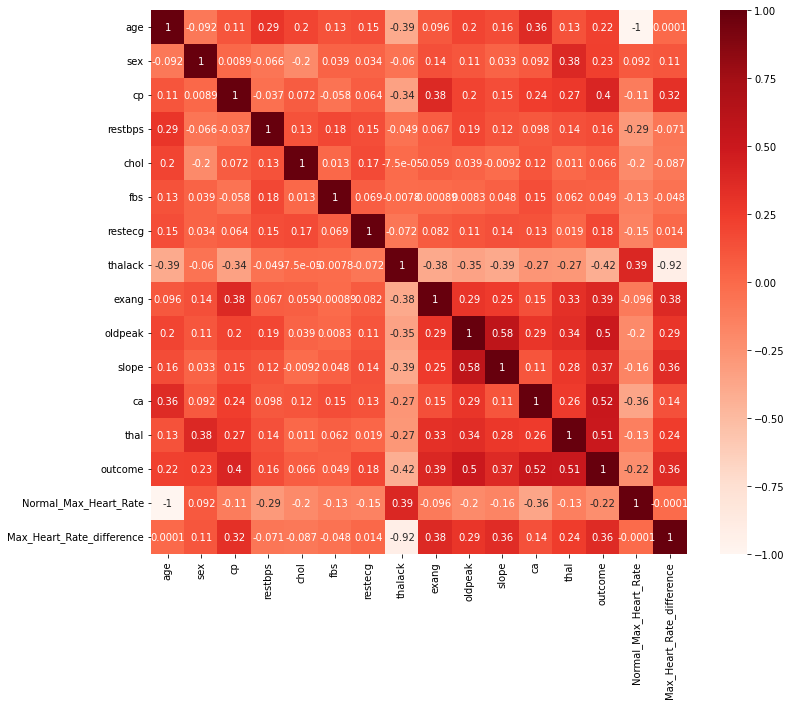

cp                           0.404248
thalack                      0.420639
exang                        0.391613
oldpeak                      0.501461
slope                        0.374689
ca                           0.521178
thal                         0.513377
outcome                      1.000000
Max_Heart_Rate_difference    0.362408
Name: outcome, dtype: float64


,cp,thalack,exang,oldpeak,slope,ca,thal,outcome,Max_Heart_Rate_difference
0,1,150,0,2.3,3,0,6,0,7.0
1,4,108,1,1.5,2,3,3,2,45.0
2,4,129,1,2.6,2,2,7,1,24.0
3,3,187,0,3.5,3,0,3,0,-4.0
4,2,172,0,1.4,1,0,3,0,7.0
...,...,...,...,...,...,...,...,...,...
292,4,123,1,0.2,2,0,7,1,40.0
293,1,132,0,1.2,2,0,7,1,43.0
294,4,141,0,3.4,2,2,7,2,11.0
295,4,115,1,1.2,2,1,7,3,48.0


In [44]:
CorrDF = Corr(df1, 'outcome')
CorrDF

In [45]:
df1.drop(['Normal_Max_Heart_Rate'], axis=1,inplace=True)

In [46]:
df1

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,Max_Heart_Rate_difference
0,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0,7.0
1,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2,45.0
2,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1,24.0
3,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0,-4.0
4,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0,4,140,241,0,0,123,1,0.2,2,0,7,1,40.0
293,45.0,1,1,110,264,0,0,132,0,1.2,2,0,7,1,43.0
294,68.0,1,4,144,193,1,0,141,0,3.4,2,2,7,2,11.0
295,57.0,1,4,130,131,0,0,115,1,1.2,2,1,7,3,48.0


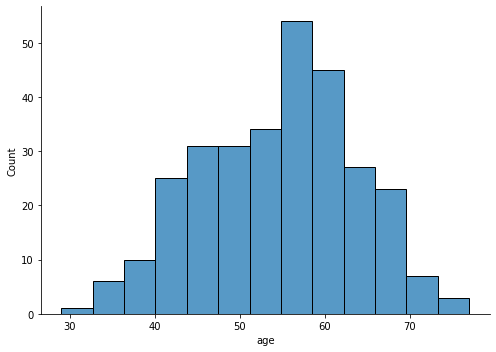

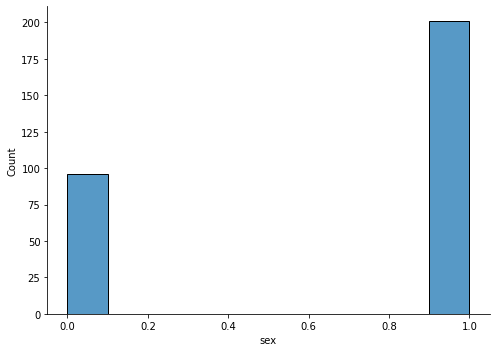

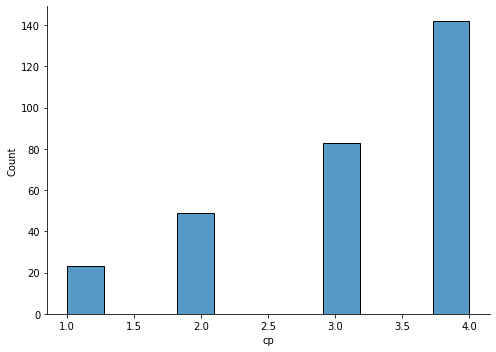

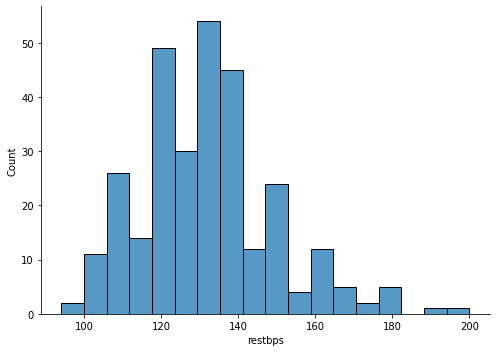

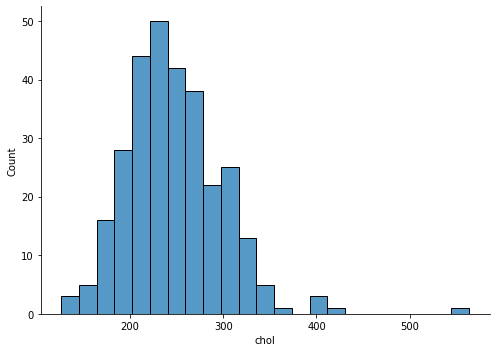

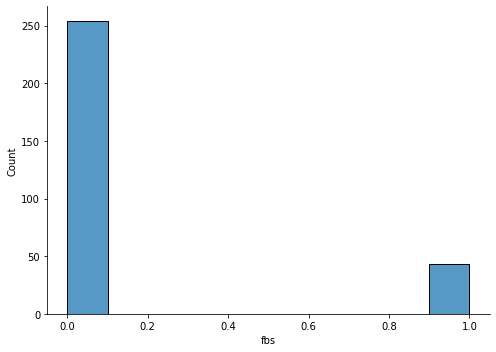

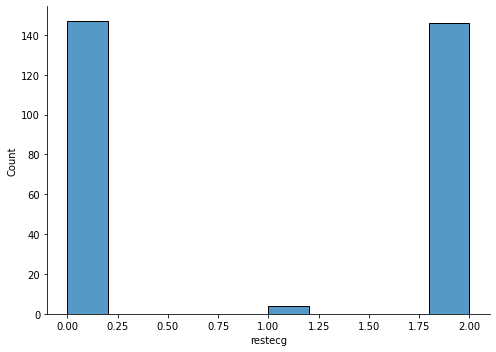

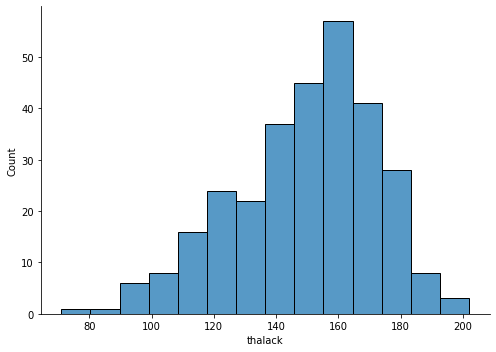

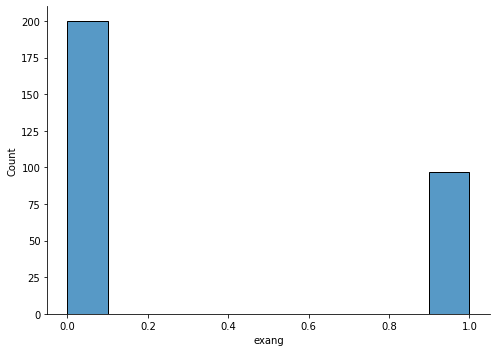

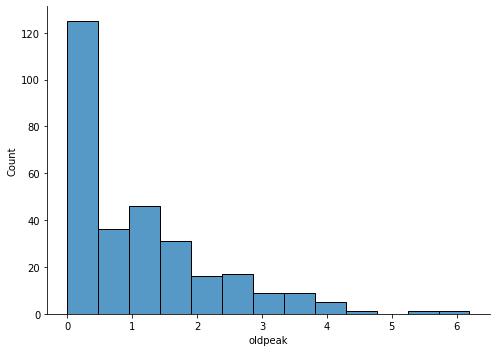

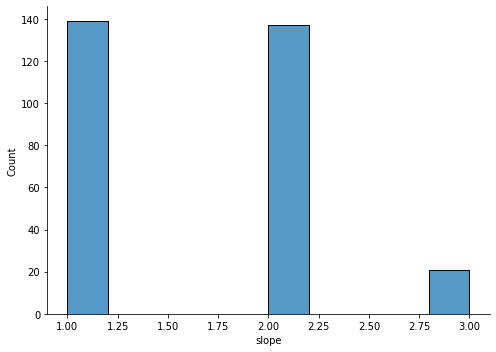

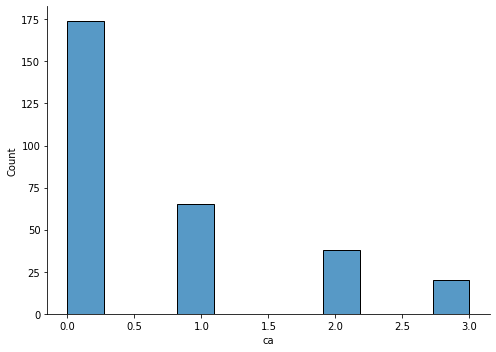

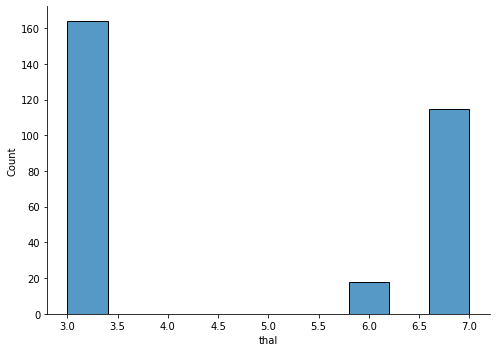

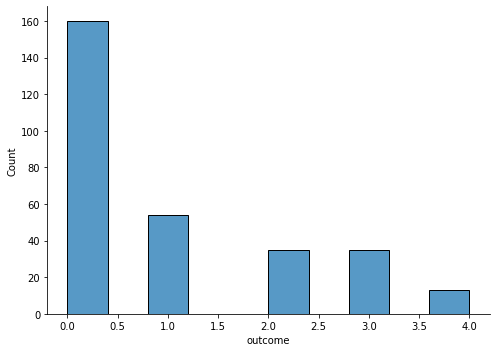

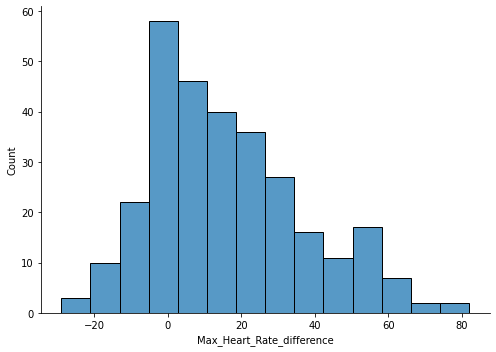

In [47]:
cols_list = list(df1.columns)
for column in cols_list:
  sns.displot(
  data=df1,
  x=column,
  kind="hist",
  aspect=1.4
)

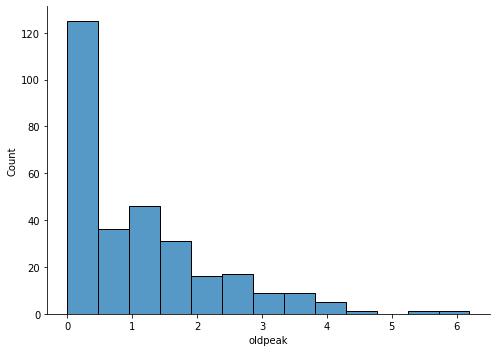

In [48]:
sns.displot(
data=df1,
x='oldpeak',
kind="hist",
aspect=1.4
)

In [49]:
df1

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,Max_Heart_Rate_difference
0,63.0,1,1,145,233,1,2,150,0,2.3,3,0,6,0,7.0
1,67.0,1,4,160,286,0,2,108,1,1.5,2,3,3,2,45.0
2,67.0,1,4,120,229,0,2,129,1,2.6,2,2,7,1,24.0
3,37.0,1,3,130,250,0,0,187,0,3.5,3,0,3,0,-4.0
4,41.0,0,2,130,204,0,2,172,0,1.4,1,0,3,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0,4,140,241,0,0,123,1,0.2,2,0,7,1,40.0
293,45.0,1,1,110,264,0,0,132,0,1.2,2,0,7,1,43.0
294,68.0,1,4,144,193,1,0,141,0,3.4,2,2,7,2,11.0
295,57.0,1,4,130,131,0,0,115,1,1.2,2,1,7,3,48.0


In [50]:
df1['outcome'].replace(2, 1, inplace=True)
df1['outcome'].replace(3, 1, inplace=True)
df1['outcome'].replace(4, 1, inplace=True)

In [51]:
df1.describe()

,age,sex,cp,restbps,chol,fbs,restecg,thalack,exang,oldpeak,slope,ca,thal,outcome,Max_Heart_Rate_difference
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279,15.858586
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340,21.080289
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,-29.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,12.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000,28.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,82.000000


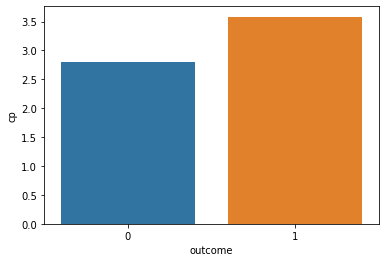

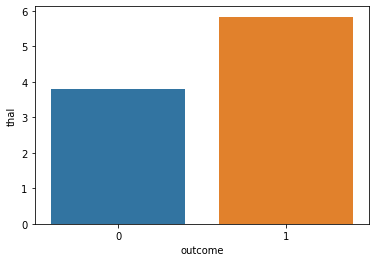

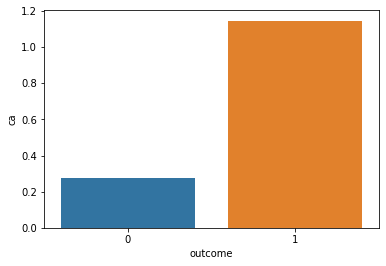

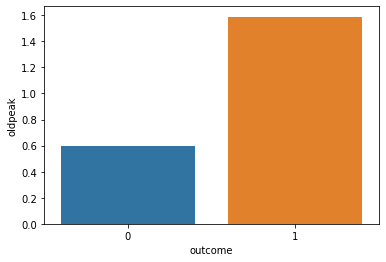

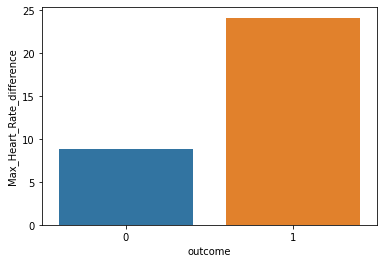

In [54]:
High_corr = ['cp', 'thal', 'ca', 'oldpeak', 'Max_Heart_Rate_difference']

for column in High_corr:
  sns.barplot(x='outcome', y=column, data=df1, ci=None)
  plt.show()

In [53]:
df1.to_csv('cleanedOsama.csv')